## Reading and Understanding the Data

In [255]:
import warnings
import pandas as pd
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [256]:
housing = pd.read_csv('/Users/prai/Documents/GitHub/Code_Clue/Multiple Linear Regression/Housing.csv')

In [257]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [258]:
# Here we can see number of property details
housing.shape

(545, 13)

In [259]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


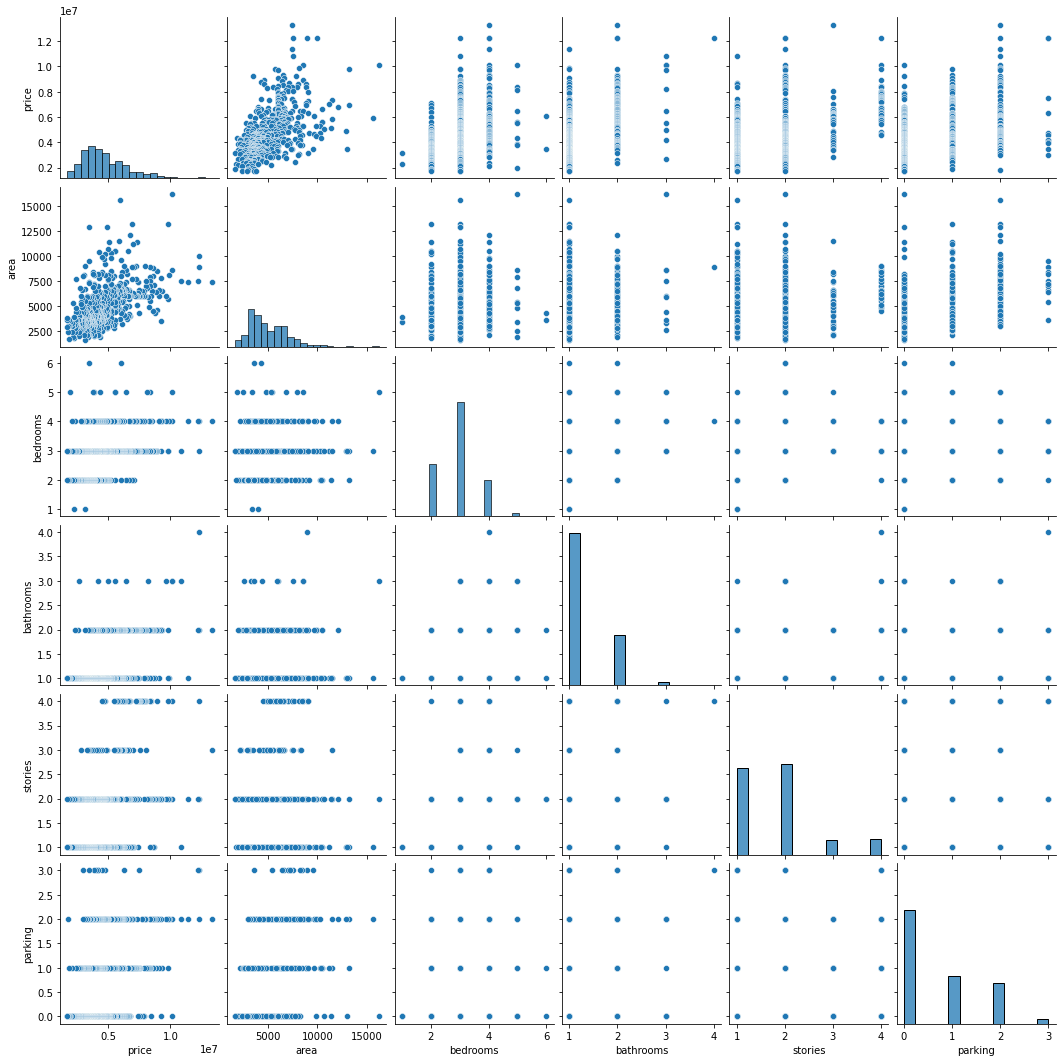

In [260]:
# Visualization numerical variable
sns.pairplot(housing)

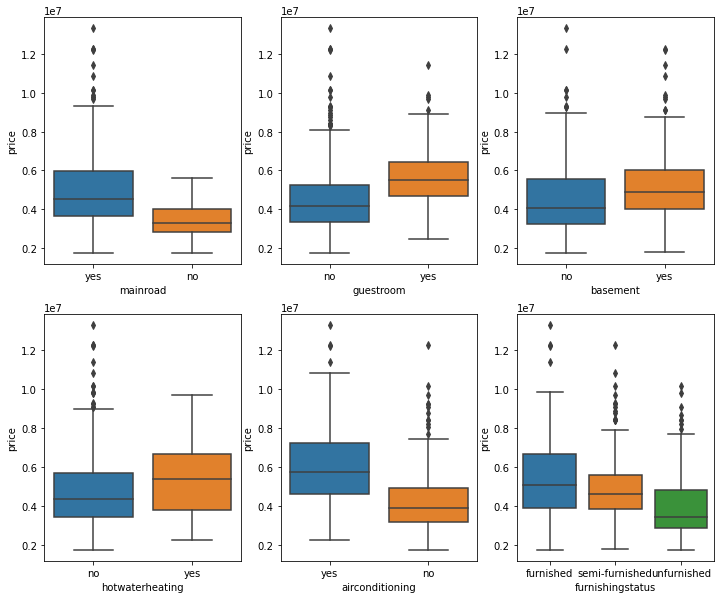

In [261]:
# Visualization categorical variable
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)

plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)

plt.show()

## Preparing data for modelling
- Encoding
    - Convert Binary to 1/0
    - Convert Categorical to dummy variable

In [262]:
print(housing.mainroad.value_counts())
print(housing.guestroom.value_counts())
print(housing.basement.value_counts())
print(housing.hotwaterheating.value_counts())
print(housing.airconditioning.value_counts())

yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64


In [263]:
# Yes/No type variables
varlist = ['mainroad' ,'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']
housing[varlist]=housing[varlist].apply(lambda x:x.map({'yes':1 , 'no':0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [264]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [265]:
# creating dummies var for furnishing status 
status =pd.get_dummies(housing['furnishingstatus'])

In [266]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


#### Insted of keeping all three column just keep two as it can be solve by two columns for dummy values so make it two and drop column 
- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to furnished

In [267]:
# creating dummies var for furnishing status 
# Droping a dedundent dummy var
status =pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [268]:
# concat dummy with df of original
housing = pd.concat([housing , status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [269]:
housing = housing.drop('furnishingstatus',axis=1)

In [270]:
housing.shape

(545, 14)

- Steps
    - Test Training Split
    - Scaling the features

In [271]:
# Splitting into train test split
df_train ,df_test = train_test_split(housing , train_size=0.7 , random_state=100)
print(df_train.head())
print("\n*******\n")
print(df_test.head())

print(df_train.shape)
print("\n*******\n")
print(df_test.shape)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
359  3710000  3600         3          1        1         1          0   
19   8855000  6420         3          2        2         1          0   
159  5460000  3150         3          2        1         1          1   
35   8080940  7000         3          2        4         1          0   
28   8400000  7950         5          2        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
359         0                0                0        1         0   
19          0                0                1        1         1   
159         1                0                1        0         0   
35          0                0                1        2         0   
28          1                1                0        2         0   

     semi-furnished  unfurnished  
359               0            1  
19                1            0  
159               0            0  


In [272]:
# Normalization (x-xmin)/(xmax-xmin)
# Standardisation (x-mu)/sigma


In [273]:
# Create an object for minmax scaler
scaler = MinMaxScaler()
# Create a list of only numeric variables also dont make changes for binary one , you can scale that as well but
# You will lose the interpretation of those variables.
num_variable = ['area','bedrooms','bathrooms','stories','parking','price']
# Fit on data
df_train[num_variable] = scaler.fit_transform(df_train[num_variable])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Training the model

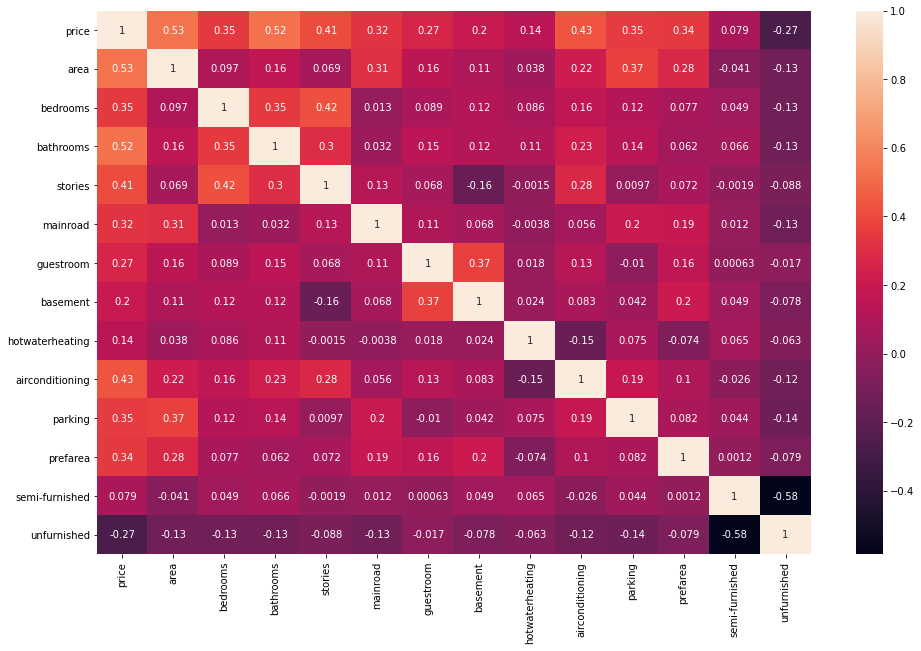

In [274]:
# Since it have total 14 variables , which can't be as important for the prediction so let's take a look into heatmap.
# look for correlation of varibales .
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True )
plt.show()

In [275]:
# X_train , y_train
y_train = df_train.pop('price')
X_train = df_train

In [276]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Add variable one by one and analysis the result

In [277]:
# Add constant
X_train_sm = sm.add_constant(X_train['area'])

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [278]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.15e-29
Time:                        02:04:24   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
# Add another variable bathrooms
X_train_sm = sm.add_constant(X_train[['area','bathrooms']])

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [280]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           2.51e-54
Time:                        02:04:24   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
# Add another variable airconditioning
X_train_sm = sm.add_constant(X_train[['area','bathrooms','airconditioning']])

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.094756
area               0.358061
bathrooms          0.265044
airconditioning    0.086986
dtype: float64

In [282]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           6.61e-63
Time:                        02:04:24   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
# Add another variable stories
X_train_sm = sm.add_constant(X_train[['area','bathrooms','airconditioning','stories']])

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.071924
area               0.361972
bathrooms          0.228600
airconditioning    0.069592
stories            0.118698
dtype: float64

In [284]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     130.2
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.14e-69
Time:                        02:04:24   Log-Likelihood:                 329.46
No. Observations:                 381   AIC:                            -648.9
Df Residuals:                     376   BIC:                            -629.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0719      0.011      6.677      0.000       0.051       0.093
area                0.3620      0.030     12.094      0.000       0.303       0.421
bathrooms           0.2286      0.024      9.651      0.000       0.182       0.275
airconditioning     0.0696      0.012      5.647      0.000       0.045       0.094
stories             0.1187      0.019      6.187      0.000       0.081       0.156
==============================================================================
Omnibus:                       82.202   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.090
Skew:                           0.994   Prob(JB):                     1.99e-52
Kurtosis:                       6.324   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
# Add another variable prefarea
X_train_sm = sm.add_constant(X_train[['area','bathrooms','airconditioning','parking','prefarea']])

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.087779
area               0.276212
bathrooms          0.259052
airconditioning    0.079996
parking            0.067189
prefarea           0.073779
dtype: float64

In [286]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     106.0
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.54e-69
Time:                        02:04:24   Log-Likelihood:                 331.71
No. Observations:                 381   AIC:                            -651.4
Df Residuals:                     375   BIC:                            -627.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0878      0.010      8.638      0.000       0.068       0.108
area                0.2762      0.033      8.453      0.000       0.212       0.340
bathrooms           0.2591      0.023     11.320      0.000       0.214       0.304
airconditioning     0.0800      0.012      6.655      0.000       0.056       0.104
parking             0.0672      0.020      3.380      0.001       0.028       0.106
prefarea            0.0738      0.013      5.721      0.000       0.048       0.099
==============================================================================
Omnibus:                       62.936   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.746
Skew:                           0.818   Prob(JB):                     4.12e-34
Kurtosis:                       5.648   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
# Here Above with ['area','bathrooms','airconditioning','parking','prefarea'] these five variable 
# ~59% of total variance is explained by them .

## Add all Variable to the model to analysis the result 

In [288]:
# Add another variable prefarea
X_train_sm = sm.add_constant(X_train)

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [289]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           8.83e-83
Time:                        02:04:24   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
# Significance of variables (p-values) , and if these are high we can drop few of the p values which are not as significant.
# If p value > 0.05 , that are probabily need to drop.
# To compute VIF import statesmodel.stats.outlieroutliers_influence.variance_inflation_factor.
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [291]:
vif[['features','VIF Factor']]

,features,VIF Factor
0,area,4.67
1,bedrooms,7.33
2,bathrooms,1.67
3,stories,2.70
4,mainroad,6.02
5,guestroom,1.47
6,basement,2.02
7,hotwaterheating,1.14
8,airconditioning,1.77
9,parking,2.12


- Here from Above if we see Higher VIF and we can also check significant p value , and check which is greater >0.05
- Also we can not remove one out of all vif or significant p value , here it need to balance both.
- Example for p value "semifurnished" have highetst p value , but in terms of VIF , Bedrooms have have VIF
- Then its important to know which need to remove and which one need to keep it.
### We could have:
- High p value and High Vif , there no need to think much just remove it.
    - High Low conditions:
        - High P value and low VIF
        - Low p value and High VIF

In [292]:
# So for Above Situation of High low Condition:
# First remove high p value becuase , once we remove p value (High) , there will be change in VIF , and that 
# Situation can tell weather VIF is still high or it chnages from High to low in range of requirement.
X = X_train.drop('semi-furnished' ,axis=1)

In [293]:
# Build another model
X_train_sm = sm.add_constant(X)

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [294]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.07e-83
Time:                        02:04:24   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
vif["features"] = X.columns
vif[["features","VIF Factor"]]

,features,VIF Factor
0,area,4.67
1,bedrooms,6.59
2,bathrooms,1.67
3,stories,2.69
4,mainroad,5.68
5,guestroom,1.47
6,basement,2.01
7,hotwaterheating,1.14
8,airconditioning,1.77
9,parking,2.12


In [296]:
# Remove Bedroom as it have high VIF
X1 = X.drop('bedrooms',axis=1)

In [297]:
# Build another model
X_train_sm = sm.add_constant(X1)

# create first model 
lr = sm.OLS(y_train ,X_train_sm)

# Fit
lr_model = lr.fit()

# Params
lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [298]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           2.73e-84
Time:                        02:04:25   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X1.values, i),2) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif[["features","VIF Factor"]]

,features,VIF Factor
0,area,4.55
1,bathrooms,1.61
2,stories,2.23
3,mainroad,4.79
4,guestroom,1.46
5,basement,1.87
6,hotwaterheating,1.12
7,airconditioning,1.76
8,parking,2.10
9,prefarea,1.50


## Final result with fearture mentioned above in vif df.
- Currenty R2 value is ~68 percent , which is very good in terms of variation.

### For test Purpose , not needed to implement 

In [300]:
# # For more safer side , just try for VIF < or ~2.5
# # For that remove area and mainroad and try weather p value will increase of it make worst .
# # Remove mainroad and area as it have high VIF>2
# X1 = X.drop(['area','mainroad'],axis=1)

In [301]:
# # Build another model
# X_train_sm = sm.add_constant(X1)

# # create first model 
# lr = sm.OLS(y_train ,X_train_sm)

# # Fit
# lr_model = lr.fit()

# # Params
# lr_model.params

In [302]:
# lr_model.summary()

In [303]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [round(variance_inflation_factor(X1.values, i),2) for i in range(X1.shape[1])]
# vif["features"] = X1.columns
# vif[["features","VIF Factor"]]

- Here we can see once we removed the feature "area" and "mainroad" , the R2 value decrease from ~68% -- to -- ~60 percentage , which is drop in R2 value , so keep area and mainroad in your feature list .

## Residual Analysis

In [304]:
y_train_pred = lr_model.predict(X_train_sm)

In [305]:
y_train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

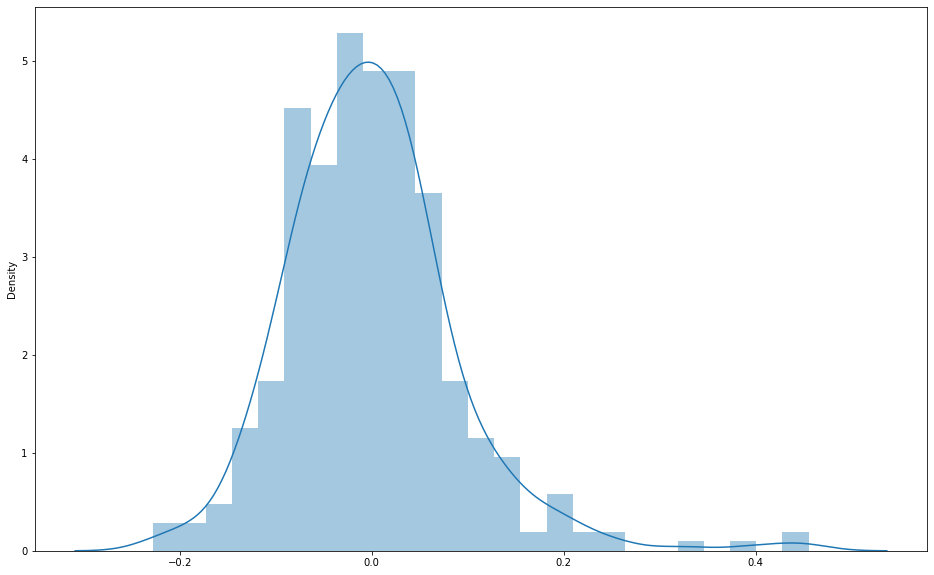

In [309]:
residual  = y_train-y_train_pred
plt.figure(figsize=(16,10))
sns.distplot(residual)
plt.show()

- Here from this distribution graph it should be centred around zero and , distribution should be Approximately normal in nature.

## Prediction and Evaluation on the test set